The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning. As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. The data is stored in two CSV files:
___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US




El Centro de Datos de Combustibles Alternativos del Gobierno de EE. UU. recopila registros de la infraestructura de carga de vehículos eléctricos (VE), incluyendo puertos de carga y ubicaciones de estaciones, así como ventas de vehículos eléctricos. Con el mercado de VE evolucionando rápidamente, es esencial entender las tendencias de crecimiento en instalaciones de carga y ventas para informar la planificación estratégica. Como científico de datos que trabaja para un operador líder de redes de carga de VE, reconoces el potencial de estos datos y comienzas a manipular y visualizar los datos agregados anuales.

Estos datos anuales capturados en diciembre de cada año abarcan un registro de instalaciones de puertos de carga de VE y ubicaciones de estaciones durante aproximadamente diez años, capturando tanto entornos de carga públicos como privados. Los datos se almacenan en dos archivos CSV:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_1 = 'ev_sales.csv'
file_2 ='private_ev_charging.csv'
file_3 = 'public_ev_charging.csv'


df_sales = pd.read_csv(file_1)
df_private = pd.read_csv(file_2)

df_public = pd.read_csv(file_3)



In [9]:
print(df_private.info())
print(df_public.info())

# valores nulos

print(df_private.isna().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   year                       9 non-null      int64
 1   private_ports              9 non-null      int64
 2   private_station_locations  9 non-null      int64
dtypes: int64(3)
memory usage: 348.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   year                      10 non-null     int64
 1   public_ports              10 non-null     int64
 2   public_station_locations  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
<bound method DataFrame.sum of     year  private_ports  private_station_locations
0  False          False                      False
1  False          False            

In [10]:

#def_temp = df_private.merge(df_public, on ='year') -Este es el algoritmo que escribi
#esta es la solucion

"""
on='year': Este argumento especifica que la unión se realizará en la columna 'year'. Esto implica que ambas DataFrames deben tener una columna llamada 'year' que sirva como clave para la unión.

how='outer': Indica que se realizará una unión externa, lo que significa que se conservarán todas las filas de ambas DataFrames, y se llenarán con valores nulos aquellas filas para las cuales no haya coincidencias en la columna 'year'.

indicator=True: Agrega una columna llamada '_merge' al resultado, que indica de qué DataFrame provienen los datos ('left_only', 'right_only', o 'both')
'left_only': Indica que la fila proviene solo del DataFrame izquierdo (df_private en este caso), lo que significa que no hay coincidencia en la columna 'year' en el DataFrame derecho (df_public).

'right_only': Indica que la fila proviene solo del DataFrame derecho (df_public en este caso), lo que significa que no hay coincidencia en la columna 'year' en el DataFrame izquierdo (df_private).

'both': Indica que la fila proviene de ambos DataFrames, lo que significa que hay una coincidencia en la columna 'year' en ambos DataFrames.
"""

def_combined = df_private.merge(df_public, on ='year', how='outer',indicator=True)

def_temp = def_combined[def_combined['_merge']=='both']

def_temp = def_temp.drop(columns=['_merge'])



In [11]:
#
ev_total_sales = df_sales.groupby('year')['sales'].sum().reset_index()
# Inspect the data and save the variable
print(ev_total_sales)
ev_sales_2018 = 361315

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  2016  159616.0
6  2017  195581.0
7  2018  361315.0
8  2019  326644.0


In [12]:
df_complete = def_temp.merge(ev_total_sales, how='left', on='year')

df_complete = df_complete.dropna(subset='sales')


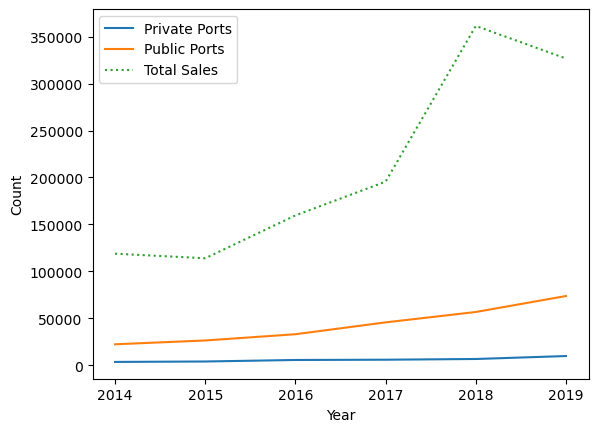

In [13]:
fix, ax = plt.subplots()

sns.lineplot(data=df_complete,
             x='year',
             y='private_ports', 
             label = 'Private Ports')
sns.lineplot(data=df_complete,
             x='year',
             y='public_ports', 
             label = 'Public Ports')
sns.lineplot(data=df_complete,
             x='year',
             y='sales', 
             label = 'Total Sales',
             linestyle= ':')

ax.set_title = ('EV Ports and Sales Overt Time')
ax.set(xlabel='Year', ylabel='Count')
ax.legend(loc='upper left')
plt.show()
trend = "same"